Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 28s 13ms/step - loss: 

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved as 'mnist_digit_model.h5'


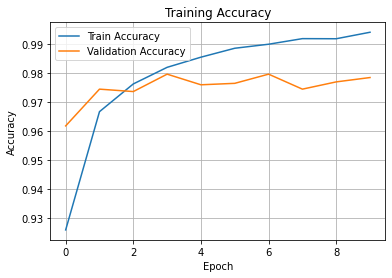

In [2]:
# ======================
# Install Dependencies (if not already)
# ======================
# !pip install tensorflow numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# ======================
# Step 1: Load Dataset
# ======================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# ======================
# Step 2: Preprocess Data
# ======================
# Normalize images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# ======================
# Step 3: Build the Model
# ======================
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Convert 2D image to 1D vector
    Dense(128, activation='relu'),       # Hidden layer
    Dense(64, activation='relu'),        # Hidden layer
    Dense(10, activation='softmax')      # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ======================
# Step 4: Train the Model
# ======================
history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)

# ======================
# Step 5: Evaluate the Model
# ======================
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Test accuracy: {test_acc * 100:.2f}%")

# ======================
# Step 6: Save the Model
# ======================
model.save("mnist_digit_model.h5")
print("✅ Model saved as 'mnist_digit_model.h5'")

# ======================
# Optional: Plot Training History
# ======================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


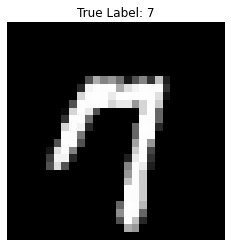

1/1 [==============================] - 1s 542ms/step
🔍 Predicted Digit: 7


In [3]:
# Load the saved model
from tensorflow.keras.models import load_model

model = load_model("mnist_digit_model.h5")

# Predict a test image
import random
index = random.randint(0, len(x_test)-1)
sample_image = x_test[index]

plt.imshow(sample_image, cmap='gray')
plt.title("True Label: " + str(y_test[index]))
plt.axis('off')
plt.show()

# Model prediction
prediction = np.argmax(model.predict(sample_image.reshape(1, 28, 28)))
print("🔍 Predicted Digit:", prediction)